## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn scikit-learn sklearn-pandas -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix
)


## Loading the dataset

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')

path_to_file = './data/Loan_Modelling.csv'
loan_modelling_dataFrame = pd.read_csv(path_to_file)

# Copy the original DataFrame for further manipulation
data = loan_modelling_dataFrame.copy()

Mounted at /content/drive/


## Data Overview

In [4]:
# Sample view data from top
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# Sample view of data from bottom
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
# Checking shape of data
print(f'Dataframe has {data.shape[0]} rows and {data.shape[1]} columns.')

Dataframe has 5000 rows and 14 columns.


In [7]:
# Checking datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
# Checking Statistical Summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Observations

*   ID field do not seem to contribute any value. This can be removed.
*   Experience has negative values. This will need to be checked further.
*   Numeric ZIPCode do not add value to our analysis and should be converted to a Categorical field.
*   Education (1, 2 and 3 years), Personal Loan, Security Account, CD Account, Online, CreditCard fields can also be converted to categorical fields to derive proper modelling.




In [9]:
# Removing the ID field before proceeding
data.drop(columns=['ID'], inplace=True)

In [10]:
# Checking Unique negative experience values in the data set
data[data['Experience'] < 0]['Experience'].unique()

array([-1, -2, -3])

In [11]:
# Replacing Negative Experience field values with positive values
data['Experience'] = data['Experience'].abs()

In [12]:
# Checking Unique Education values
data['Education'].unique()

array([1, 2, 3])

In [13]:
# ZipCode ranges from 90005 to 96651. Taking in to account the first 2 characters of ZipCode
# will provide a better distribution of the landscape.

# Converting to String and retriving first 2 characters
data['ZIPCode'] = data['ZIPCode'].astype(str)
data['ZIPCode'] = data['ZIPCode'].str[:2]

In [14]:
print(f'ZipCode is now spread over 7 units : {data["ZIPCode"].unique()}')

ZipCode is now spread over 7 units : ['91' '90' '94' '92' '93' '95' '96']


In [15]:
# Converting data types of Categorical Features
cols = ["Education", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard", "ZIPCode"]
data[cols] = data[cols].astype('category')

# Checking the current structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


## Exploratory Data Analysis.

###Univariate Analysis

#### Function for histogram and boxplot

In [16]:
def histogram_boxplot(data, feature, figsize=(15, 6), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

####Function to create labeled barplots

In [17]:
import warnings
warnings.filterwarnings("ignore")

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 4))
    else:
        plt.figure(figsize=(n + 2, 4))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Age

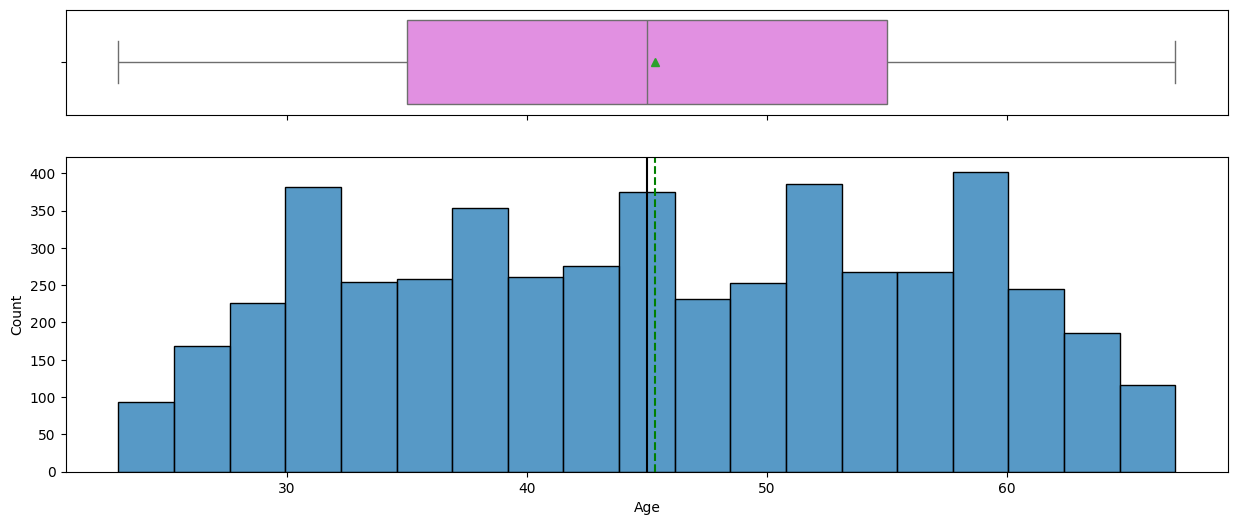

In [18]:
histogram_boxplot(data, 'Age')

#### Experience

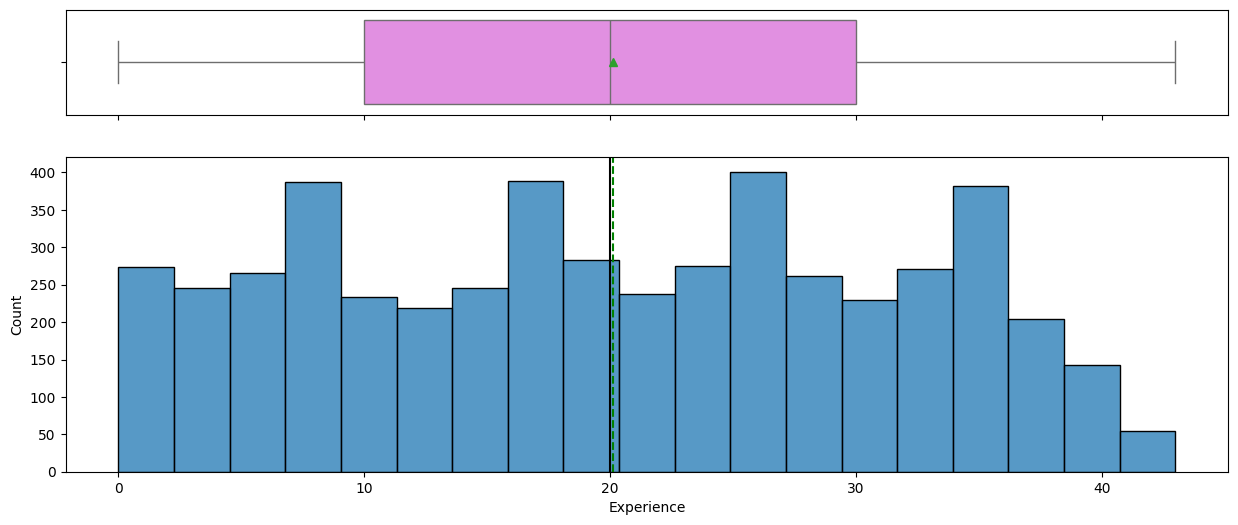

In [19]:
histogram_boxplot(data, 'Experience')

#### Income

* Has outliers and skewed to the right.

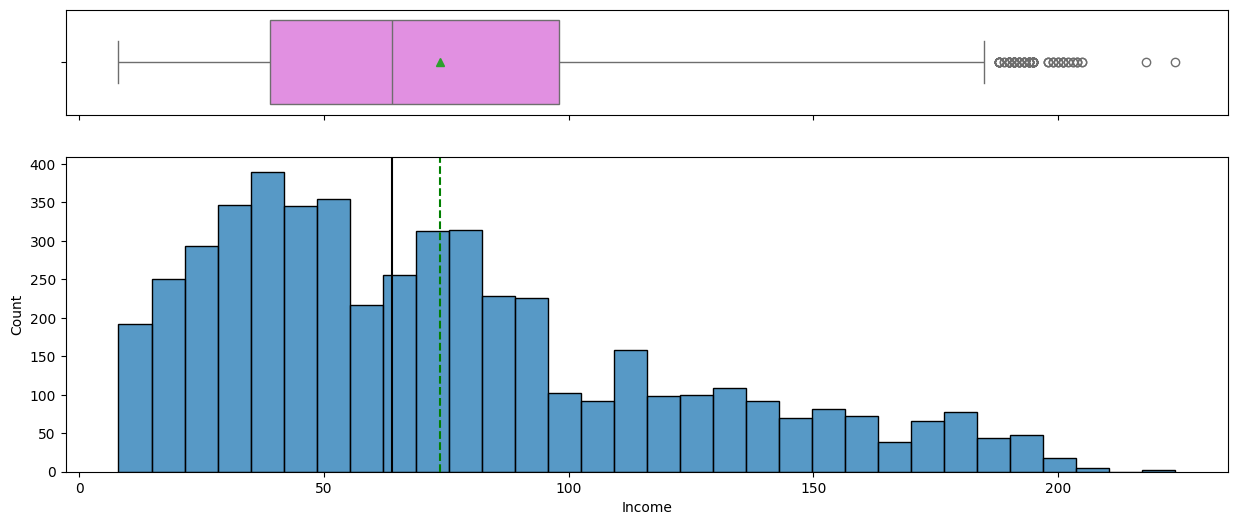

In [20]:
histogram_boxplot(data, 'Income')

#### CCAvg

* Has outliers and scewed to the right

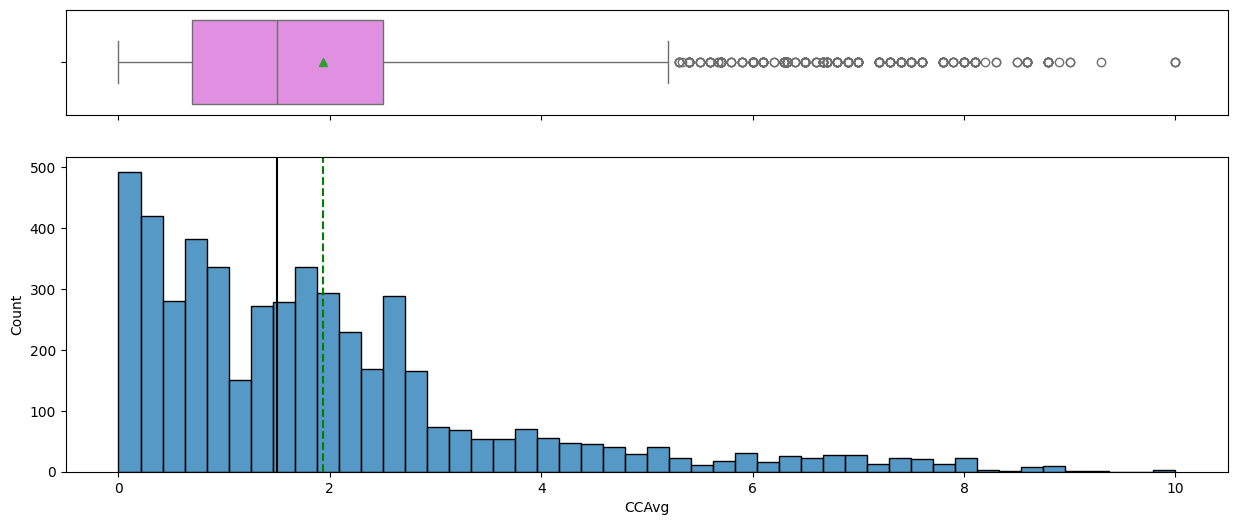

In [21]:
histogram_boxplot(data, 'CCAvg')

#### Mortgage

* is showing significant amount of outliers to the right

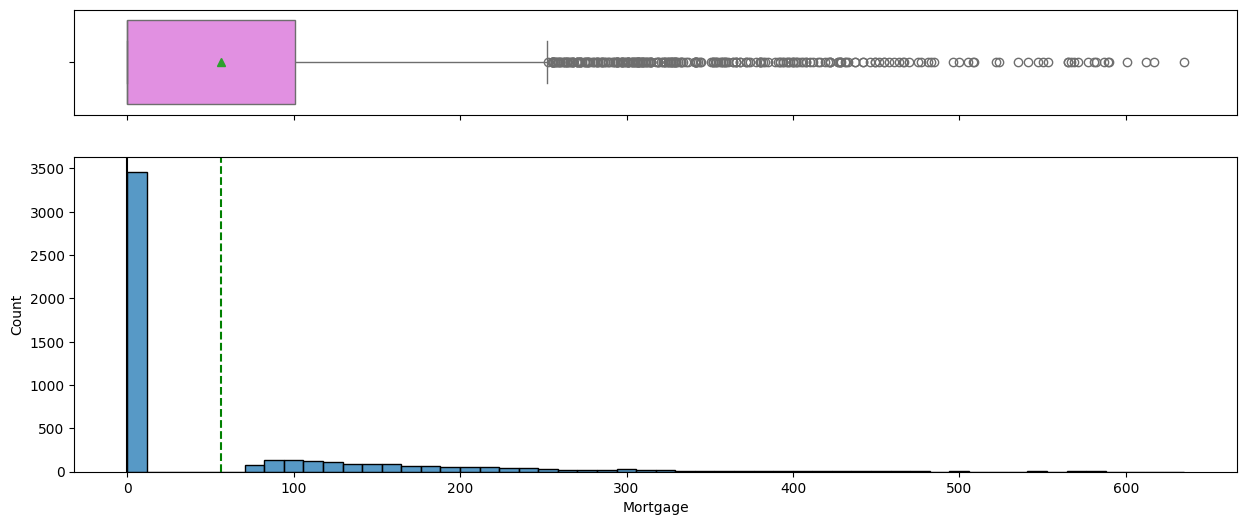

In [22]:
histogram_boxplot(data, 'Mortgage')

#### Family

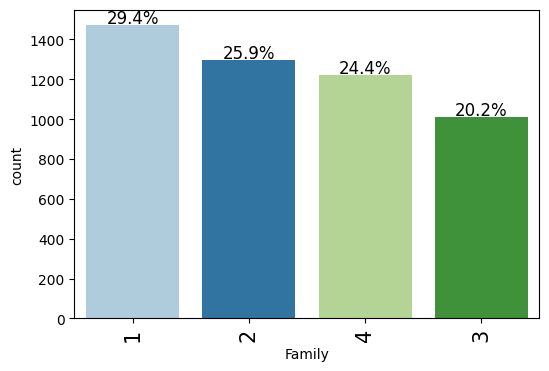

In [23]:
labeled_barplot(data, 'Family', perc=True)

#### Education

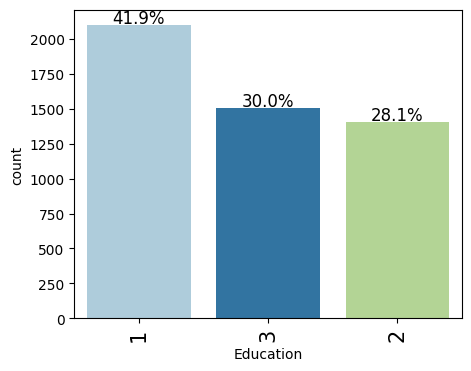

In [24]:
labeled_barplot(data, 'Education', perc=True)

#### Security Account

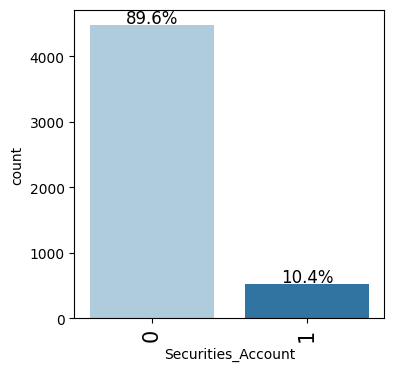

In [25]:
labeled_barplot(data, 'Securities_Account', perc=True)

#### CD Account

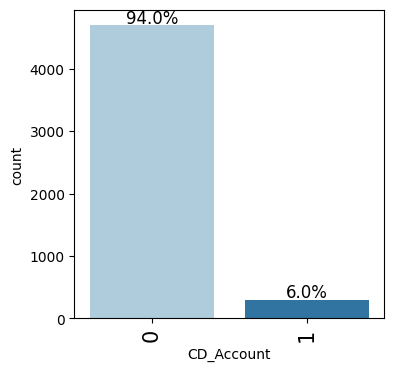

In [26]:
labeled_barplot(data, 'CD_Account', perc=True)

#### Online

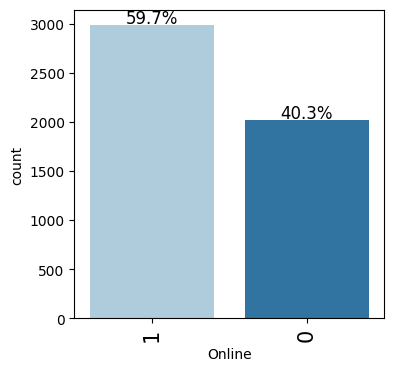

In [27]:
labeled_barplot(data, 'Online', perc=True)

#### Credit Card

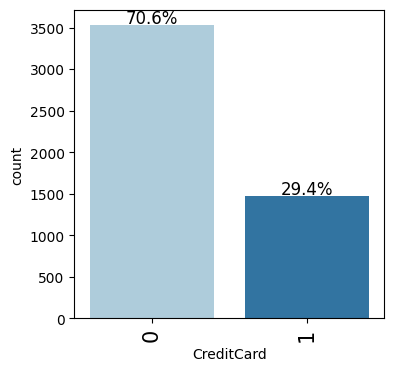

In [28]:
labeled_barplot(data, 'CreditCard', perc=True)

#### ZipCode

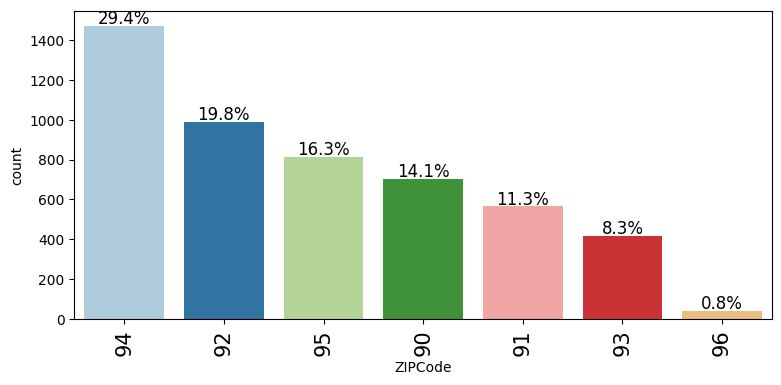

In [29]:
labeled_barplot(data, 'ZIPCode', perc=True)

In [30]:
print(data['CreditCard'].value_counts())
print("\nNumber of Customers with Credit Cards:", data['CreditCard'].value_counts().loc[1])

CreditCard
0    3530
1    1470
Name: count, dtype: int64

Number of Customers with Credit Cards: 1470


#### Observations
* Age: The distribution of age is roughly unimodal and slightly skewed to the right.  There are no apparent outliers.
* Experience: The distribution of experience is similar to age, unimodal and slightly right-skewed.  The negative values initially present were corrected.  No major outliers are evident after the correction.
* Income: The income distribution is heavily skewed to the right, indicating the presence of high-income earners.  Several outliers are present at the higher end of the distribution.
* CCAvg (Average spending on credit cards):  Similar to Income, the CCAvg distribution is also skewed to the right with noticeable outliers.
* Mortgage: The mortgage values exhibit a high number of zeros (customers without a mortgage) and a right-skewed distribution for those with mortgages. There's also a presence of significant outliers.
* Family (Family Size):  The majority of customers have a family size of 1 or 2.  The distribution tapers off as family size increases.
* Education:  The most frequent education level is "Graduate", followed by "Undergrad" and "Advanced/Professional".
* Securities Account: A relatively small percentage of customers have a securities account with the bank.
* CD Account:  A very small percentage of customers hold a certificate of deposit (CD) account.
* Online: A significant portion of customers use internet banking facilities.
* Credit Card: A substantial number of customers use credit cards issued by other banks.
* Zip Code:  The data is distributed across several zip code prefixes, suggesting potential regional differences.

### Bivariate Analysis

#### Function to create stacked barplot

In [31]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("=" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 6, 4))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

####Function to plot distributions wrt target

In [32]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(10, 6))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Finding the correlation

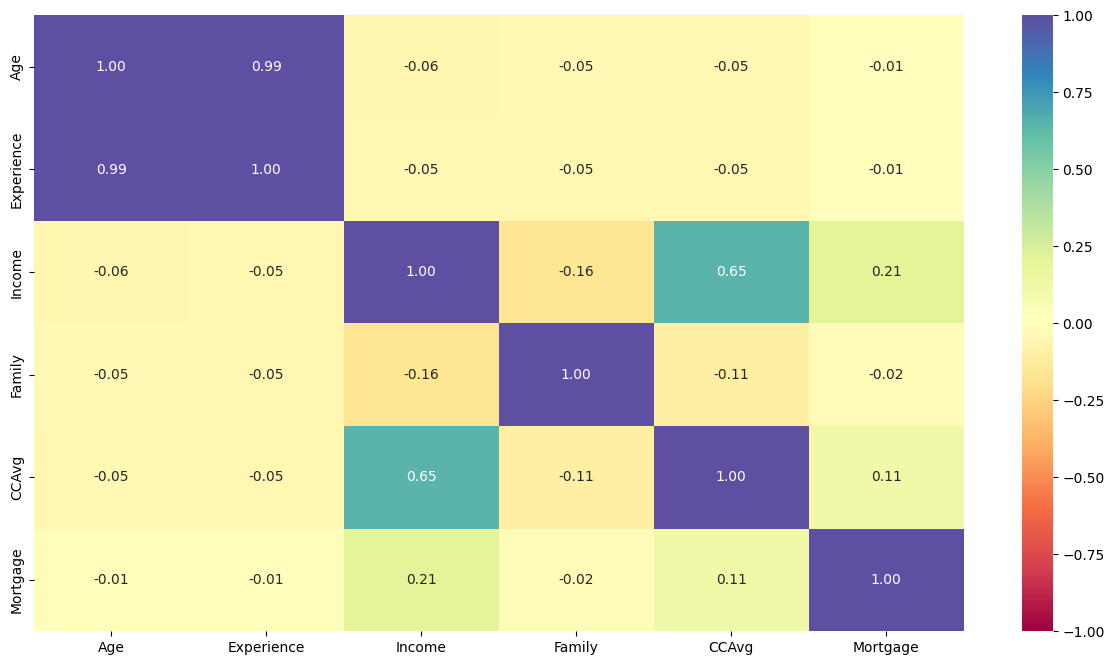

In [33]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

####Observations from the correlation heatmap:
* Strong Positive Correlation:
  - Income and CCAvg (Average spending on credit cards) show a strong positive correlation (0.65). This suggests that customers with higher incomes tend to spend more on their credit cards.

* Moderate Positive Correlation:
  - Income and Mortgage show a moderate positive correlation (0.21).  This suggests a tendency for higher-income customers to have larger mortgages.
  - Family size and income have a moderate positive correlation.
  - Age and Experience have a strong positive correlation.

* Weak or No Correlation:
  - Most of the other variable pairs show a weak or no correlation with each other.

* Correlation with Personal Loan:
  - Income, CCAvg, Education, CD Account, and Mortgage show a slight to moderate positive correlation with the target variable "Personal Loan". This suggests that higher income, higher credit card spending, higher education, having a CD account, and having a mortgage might be factors influencing a customer's likelihood of taking a personal loan.  However, these are not overwhelmingly strong correlations, and other factors likely play significant roles.

* Other Observations
###  - **Age and Experience are highly correlated, as expected, so one might consider removing one of the two in further analysis.  They both influence loan eligibility and likelihood in similar ways**

####Education vs Personal_Loan

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096


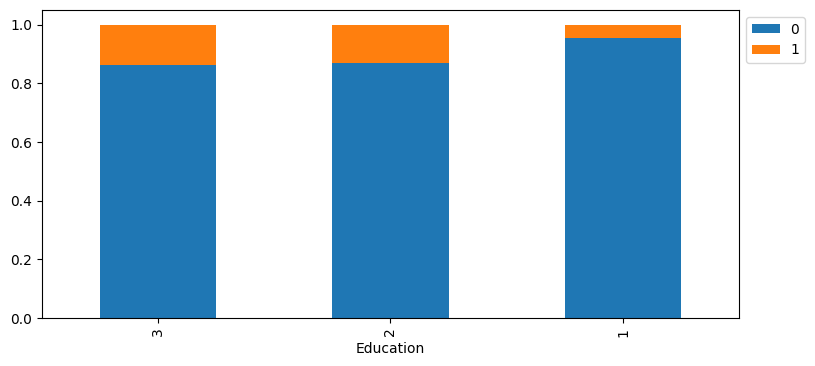

In [34]:
stacked_barplot(data, 'Education', 'Personal_Loan')

#### Family vs Personal_Loan

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296


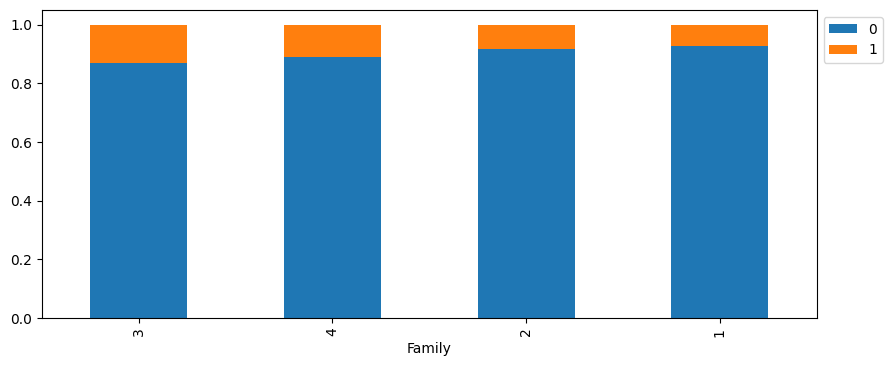

In [35]:
stacked_barplot(data, 'Family', 'Personal_Loan')

#### Security_Account vs Personal_Loan

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522


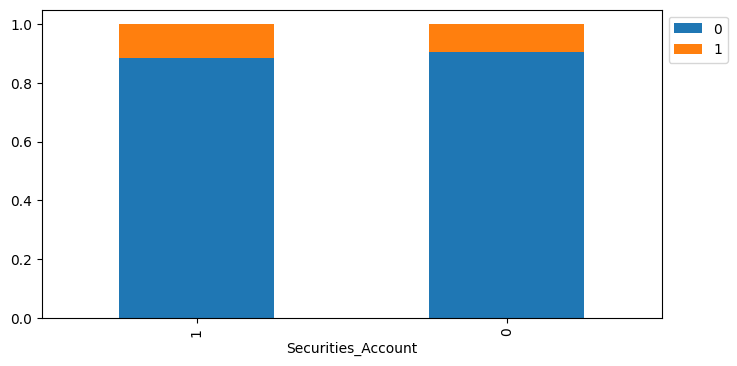

In [36]:
stacked_barplot(data, 'Securities_Account', 'Personal_Loan')

#### CD_Account vs Personal_Loan

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302


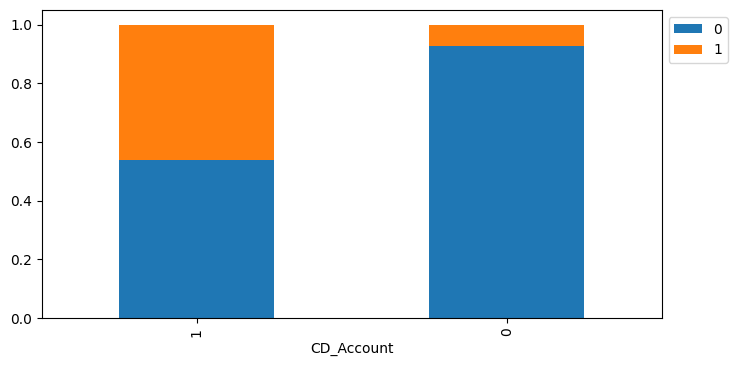

In [37]:
stacked_barplot(data, 'CD_Account', 'Personal_Loan')

#### Online vs Personal_Loan

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016


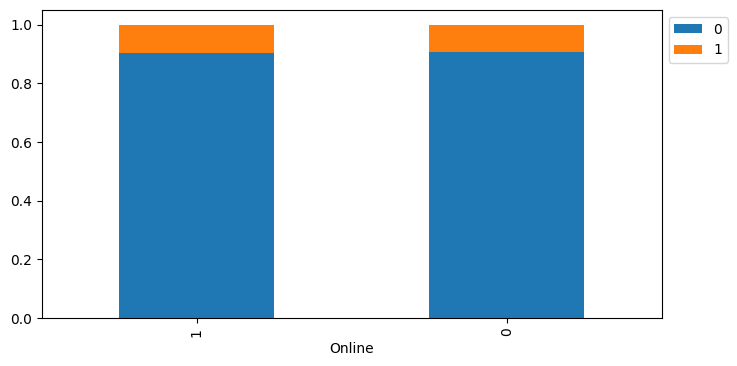

In [38]:
stacked_barplot(data, 'Online', 'Personal_Loan')

#### CreditCard vs Personal_Loan

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470


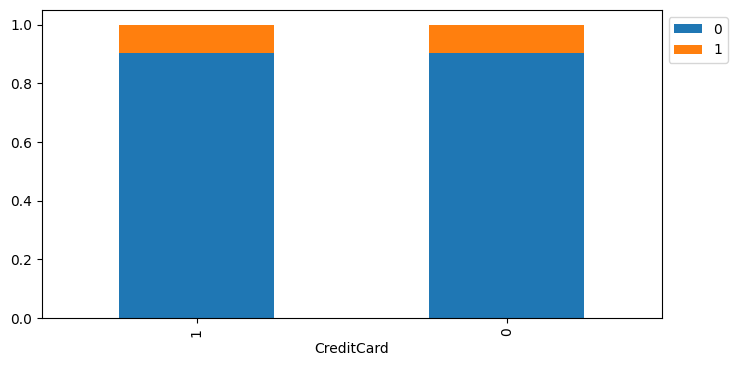

In [39]:
stacked_barplot(data, 'CreditCard', 'Personal_Loan')

####ZipCode vs Personal_Loan

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40


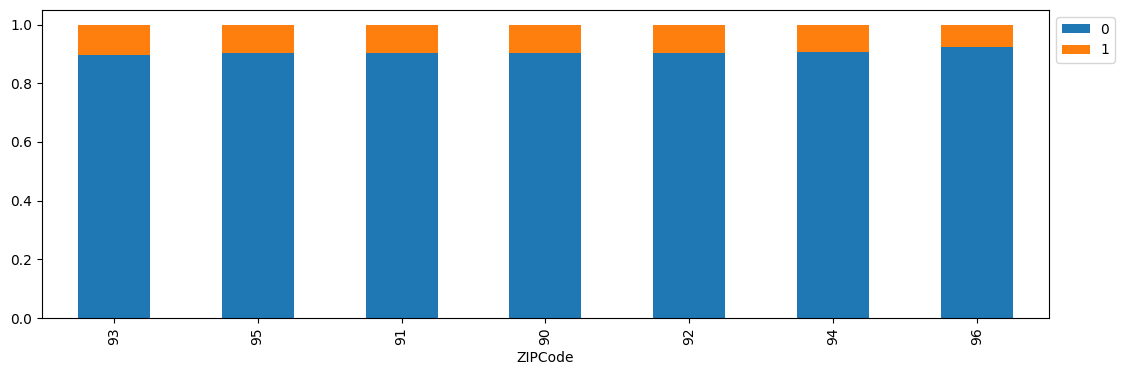

In [40]:
stacked_barplot(data, 'ZIPCode', 'Personal_Loan')

#### Age vs Personal_Loan

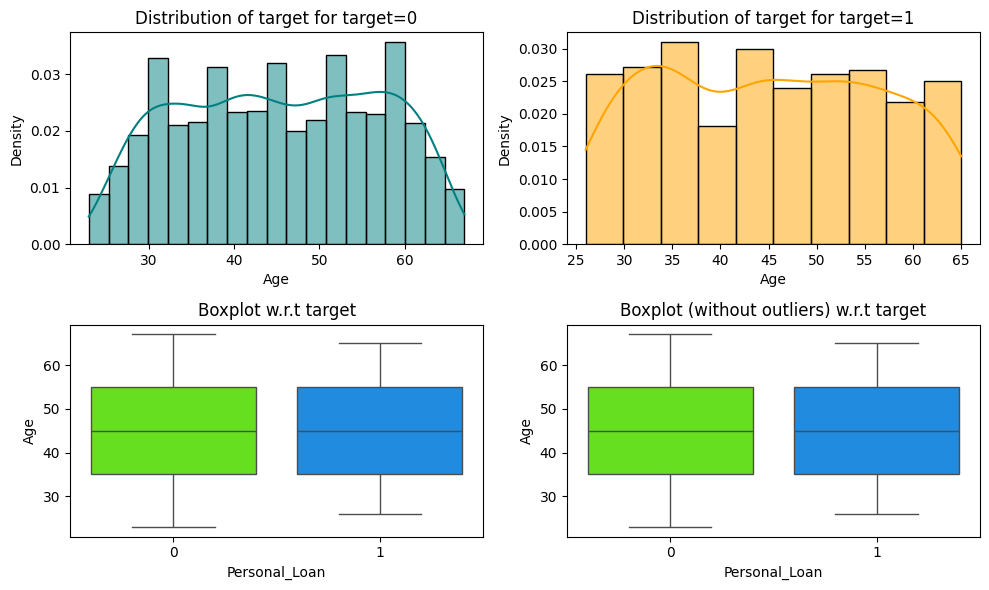

In [41]:
distribution_plot_wrt_target(data, 'Age', 'Personal_Loan')

#### Experience vs Personal_Loan

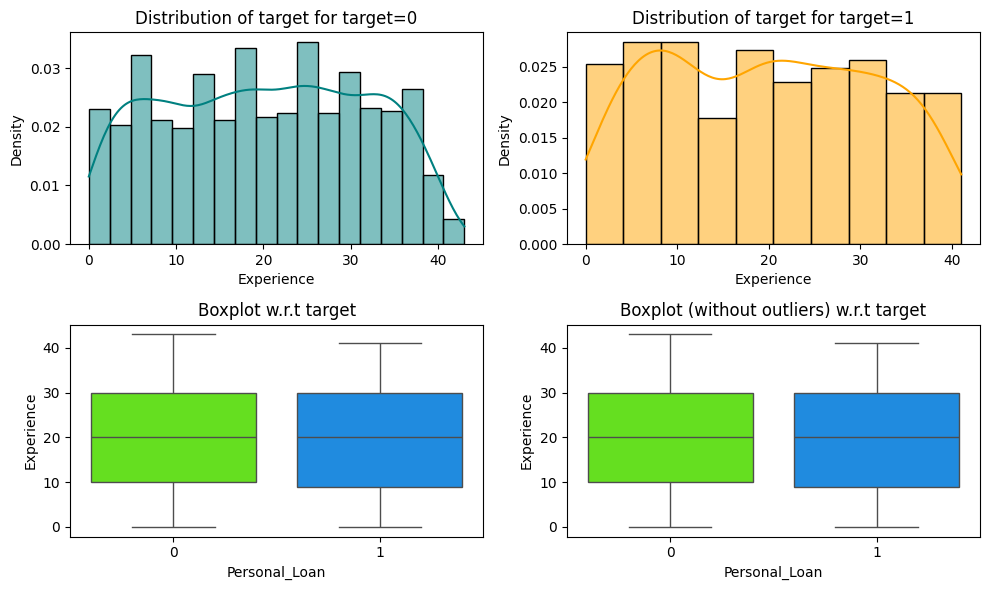

In [42]:
distribution_plot_wrt_target(data, 'Experience', 'Personal_Loan')

#### Income vs Personal_Loan

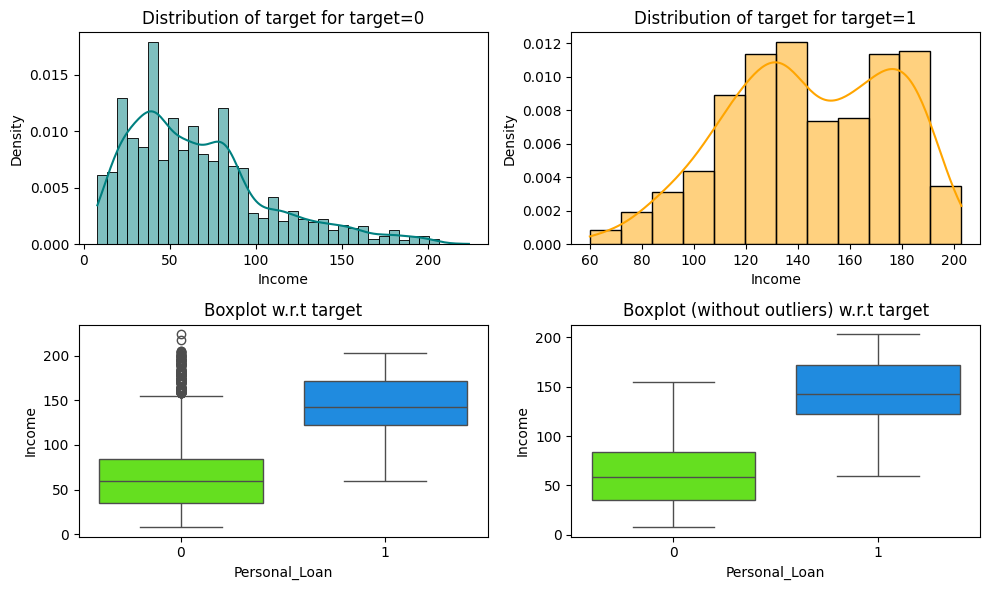

In [43]:
distribution_plot_wrt_target(data, 'Income', 'Personal_Loan')

#### CCAvg vs Personal_Loan

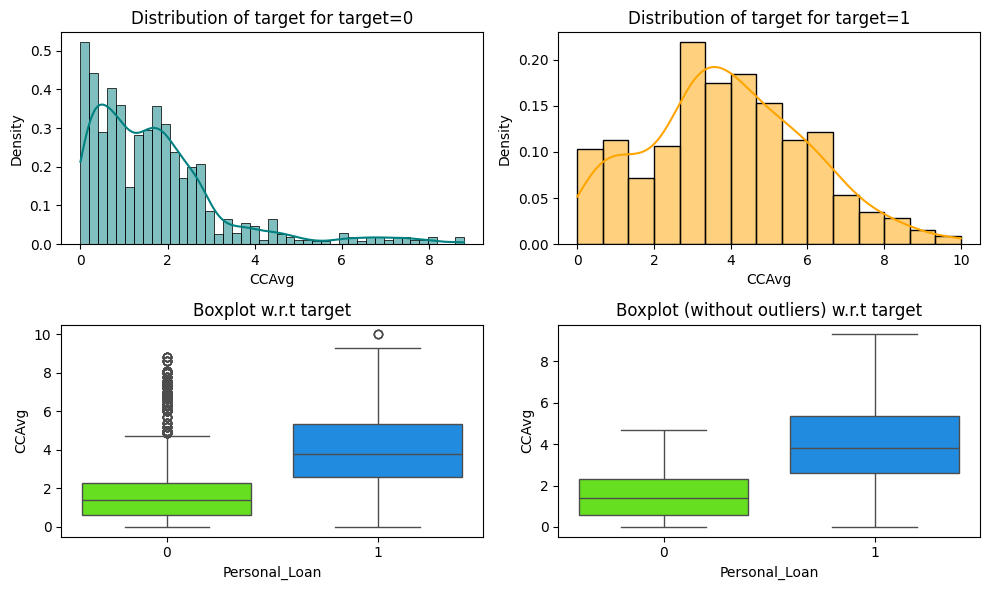

In [44]:
distribution_plot_wrt_target(data, 'CCAvg', 'Personal_Loan')

#### Observations from the Bivariate Analysis:
* Education vs. Personal Loan:  Customers with higher education levels (Graduate and Advanced/Professional) show a slightly higher likelihood of accepting personal loans compared to those with only an undergraduate degree.
* Family Size vs. Personal Loan: There's no strong trend between family size and loan acceptance.  The proportion of customers accepting loans seems relatively consistent across different family sizes.
* Securities Account vs. Personal Loan: Customers with a securities account have a noticeably lower rate of loan acceptance.
* CD Account vs. Personal Loan:  A strong positive relationship exists between having a CD account and accepting a personal loan. Customers with a CD account are significantly more likely to accept a loan offer. This could suggest higher levels of trust or a more established relationship with the bank.
* Online Banking vs. Personal Loan:  There appears to be little to no difference in loan acceptance rates between those who use online banking and those who don't.
* Zip Code vs. Personal Loan:  There are variations in loan acceptance across different zip codes.  Some zip code areas demonstrate a higher acceptance rate than others. This suggests regional differences and potentially differing customer demographics.  Further investigation might be needed to understand these differences.
* Age vs. Personal Loan: The distribution of ages is similar between customers who accepted and rejected loans.  However, there's a slight trend suggesting that customers in the age range of 30-60 have a slightly higher propensity to accept personal loans.  The boxplot also shows that the median age of loan acceptors is slightly higher than the rejecters.
* Experience vs. Personal Loan: A similar pattern to Age is observed, with no striking difference in the distributions, but the boxplot exhibits a higher median Experience for loan acceptors.
* Income vs. Personal Loan:  Customers with higher incomes show a much higher probability of accepting personal loans.  The distribution for loan acceptors is clearly shifted to the right compared to those who declined the loan.
* CCAvg vs. Personal Loan: Similar to income, there's a notable difference in the distributions of average credit card spending, with loan acceptors exhibiting higher average spending.


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [45]:
Q1 = data.select_dtypes(include=["float64", "int64"]).quantile(0.25)
Q3 = data.select_dtypes(include=["float64", "int64"]).quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

pd.concat([Q1, Q3, IQR, lower, upper], axis=1, keys=["Q1", "Q3", "IQR", "Lower", "Upper"])

,Q1,Q3,IQR,Lower,Upper
Age,35.0,55.0,20.0,5.0,85.0
Experience,10.0,30.0,20.0,-20.0,60.0
Income,39.0,98.0,59.0,-49.5,186.5
Family,1.0,3.0,2.0,-2.0,6.0
CCAvg,0.7,2.5,1.8,-2.0,5.2
Mortgage,0.0,101.0,101.0,-151.5,252.5


In [46]:
# Check the percentage of outliers
(
    pd.DataFrame(
        (data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)
    ).sum() / data.shape[0]
) * 100

,0
Age,0.00
Experience,0.00
Income,1.92
Family,0.00
CCAvg,6.48
Mortgage,5.82


In [47]:
# Removing Experience as it is perfectly correlated with Age (as per observation found during Correlation analysis)
X = data.drop(['Personal_Loan', 'Experience'], axis=1)
y = data['Personal_Loan']

X = pd.get_dummies(X, columns=['ZIPCode', 'Education'], drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

In [48]:
print(f'Shape of Training set : {X_train.shape}')
print(f'Shape of test set : {X_test.shape}')
print('--'*50,'\n')
print(f'Percentage of classes in training set:')
print(y_train.value_counts(normalize=True))
print('--'*50,'\n')
print(f'Percentage of classes in test set:')
print(y_test.value_counts(normalize=True))

Shape of Training set : (3500, 17)
Shape of test set : (1500, 17)
---------------------------------------------------------------------------------------------------- 

Percentage of classes in training set:
Personal_Loan
0    0.905143
1    0.094857
Name: proportion, dtype: float64
---------------------------------------------------------------------------------------------------- 

Percentage of classes in test set:
Personal_Loan
0    0.901333
1    0.098667
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion
* Given that the target variable 'Personal_Loan' is binary (a Classification Problem), indicating whether a customer accepted a personal loan or not,
the appropriate evaluation metrics are:
  - Accuracy
  - Presision
  - Recall
  - F1-score
  - We should also use confusion matrix to analyze the counts of true positives, true negatives, false positives, and false negatives.

### Model Building

In [49]:
# Function to compute different metrics to check performance of a classification model
def model_performance(model, predictors, target):
    """
    Compute different metrics to check performance of classification model
    """

    # predicting using the independent variables
    pred = model.predict(predictors)
    # Get Accuracy
    acc = accuracy_score(target, pred)
    # Get Recall score
    recall = recall_score(target, pred)
    # Get Precision
    precision = precision_score(target, pred)
    # Get F1-score
    f1 = f1_score(target, pred)

    # Create and return dataframe of metrics
    df_perf = pd.DataFrame(
        {'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1-Score': f1},
        index=[0],
    )

    return df_perf

In [50]:
def get_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Decision Tree with Training data (Initial)

In [51]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

####Checking model performance on training dataset

Decision Tree Performance on Training Data:
   Accuracy  Recall  Precision  F1-Score
0       1.0     1.0        1.0       1.0

Confusion Matrix on Training Data:


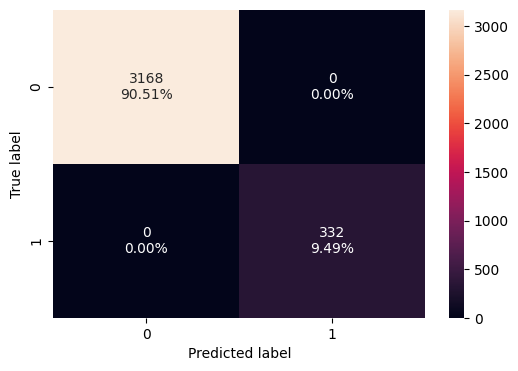

In [52]:
# Model performance on training data
decision_tree_perf_train = model_performance(model, X_train, y_train)
print("Decision Tree Performance on Training Data:")
print(decision_tree_perf_train)
print("\nConfusion Matrix on Training Data:")
get_confusion_matrix(model, X_train, y_train)

#### Draw the Decision Tree

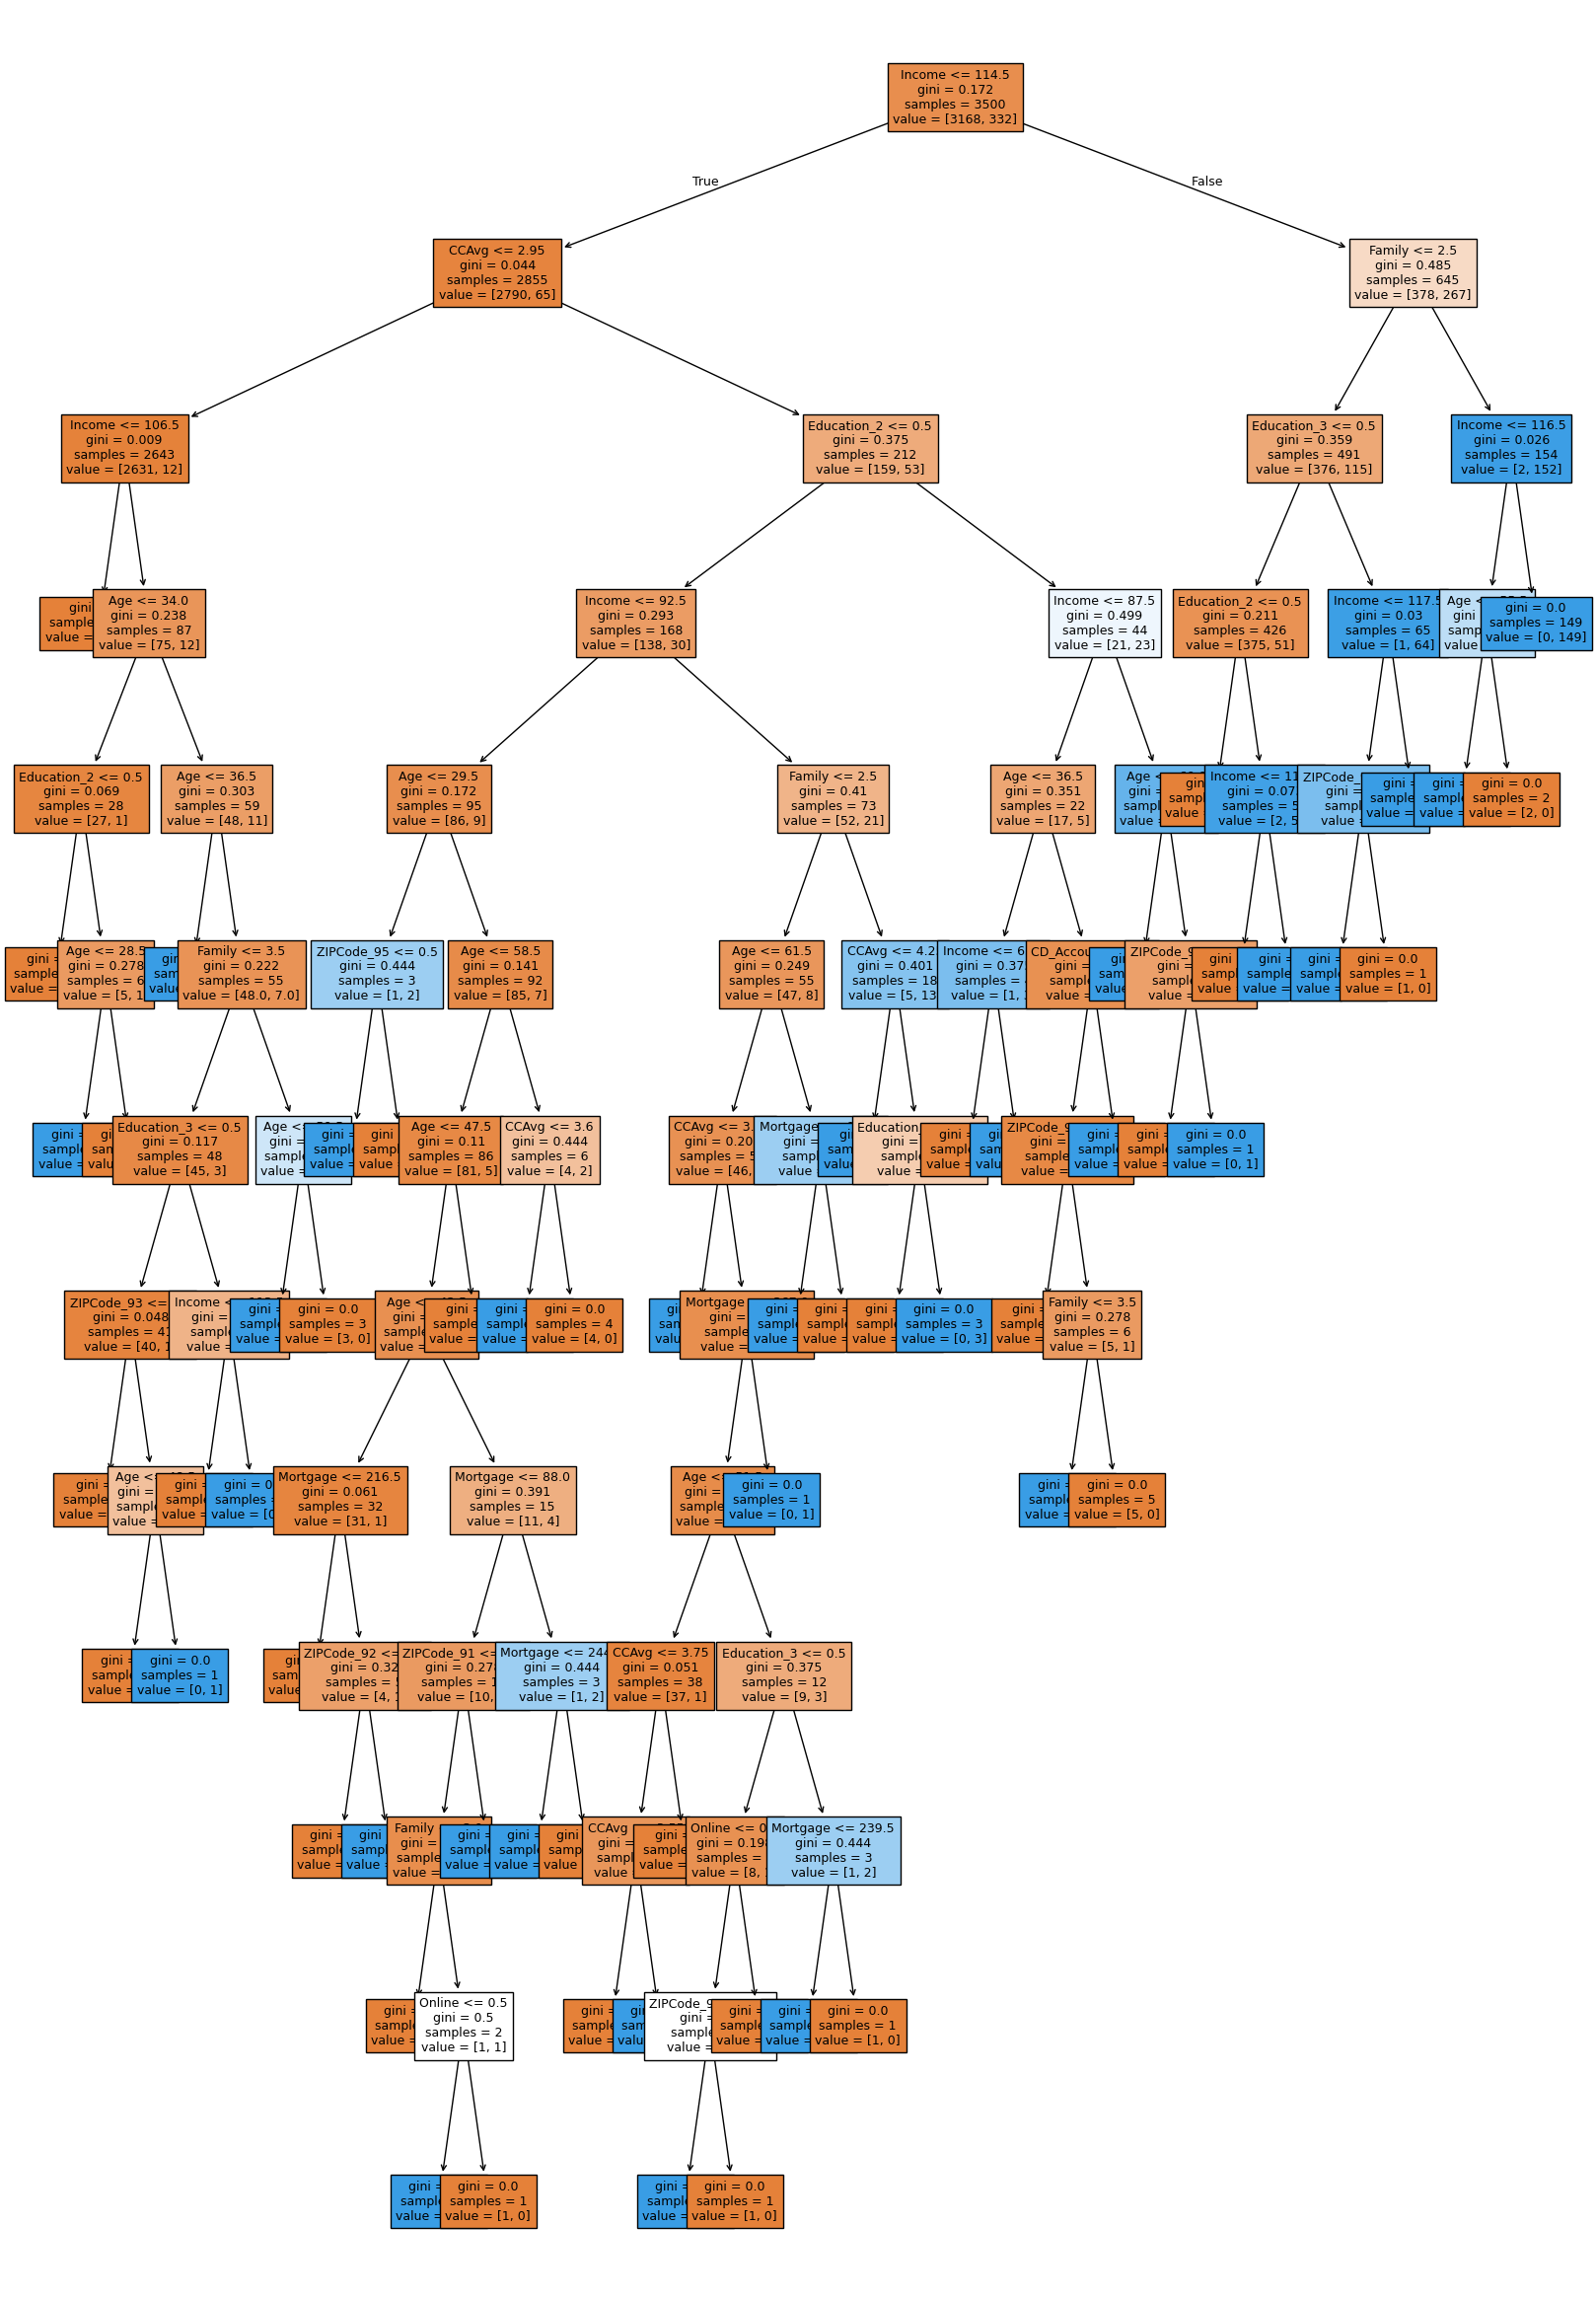

In [53]:
# Get all the Available columns in the Training dataset
feature_names = list(X_train.columns)

# Plotting the Tree View
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# Add arrows to the decision tree
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [54]:
pd.DataFrame(
        model.feature_importances_, columns=["Importance"], index=X_train.columns
    ).sort_values(by="Importance", ascending=False)


,Importance
Income,0.308155
Family,0.245489
Education_2,0.157170
Education_3,0.150292
CCAvg,0.055458
Age,0.050108
Mortgage,0.011975
ZIPCode_92,0.005324
ZIPCode_91,0.005017
Online,0.002958


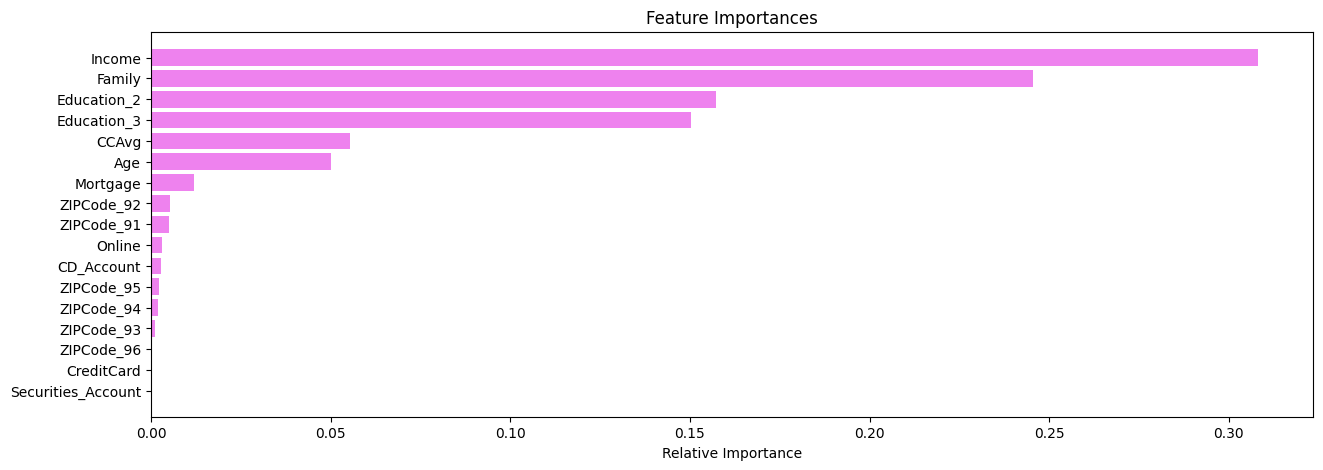

In [55]:
# Visualizing the importance
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15, 5))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Performance with Test data (Initial)



Decision Tree Performance on Test Data:
   Accuracy    Recall  Precision  F1-Score
0  0.981333  0.898649   0.910959  0.904762

Confusion Matrix on Test Data:


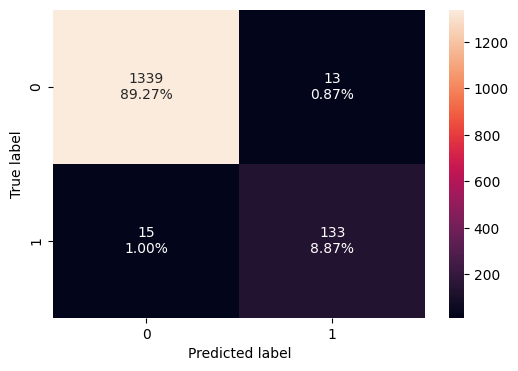

In [56]:
# Model performance on test data
decision_tree_perf_test = model_performance(model, X_test, y_test)
print("\n\nDecision Tree Performance on Test Data:")
print(decision_tree_perf_test)
print("\nConfusion Matrix on Test Data:")
get_confusion_matrix(model, X_test, y_test)

## Model Performance Improvement

### Pre-Pruning Technique

In [57]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = [50, 75, 100, 125, 150, 250]
min_samples_split_values = [10, 30, 50, 70, 90]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [58]:
estimator = best_estimator
estimator.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

#### Performance of Training data (Pre-pruning)



Decision Tree Performance on Training Data:
   Accuracy  Recall  Precision  F1-Score
0  0.789429     1.0   0.310571  0.473947

Confusion Matrix on Test Data:


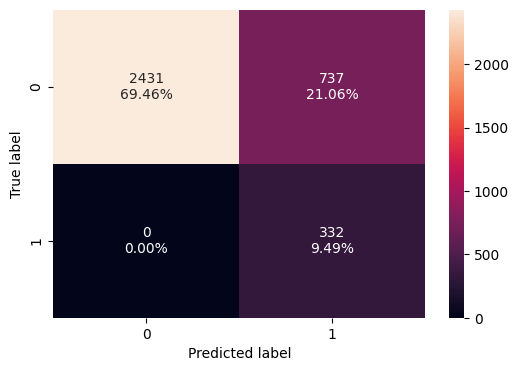

In [59]:
decision_tree_tune_perf_train = model_performance(estimator, X_train, y_train)
print("\n\nDecision Tree Performance on Training Data:")
print(decision_tree_tune_perf_train)
print("\nConfusion Matrix on Test Data:")
get_confusion_matrix(estimator,  X_train, y_train)

#### View Decision Tree (Test Data) - Pre-Prining

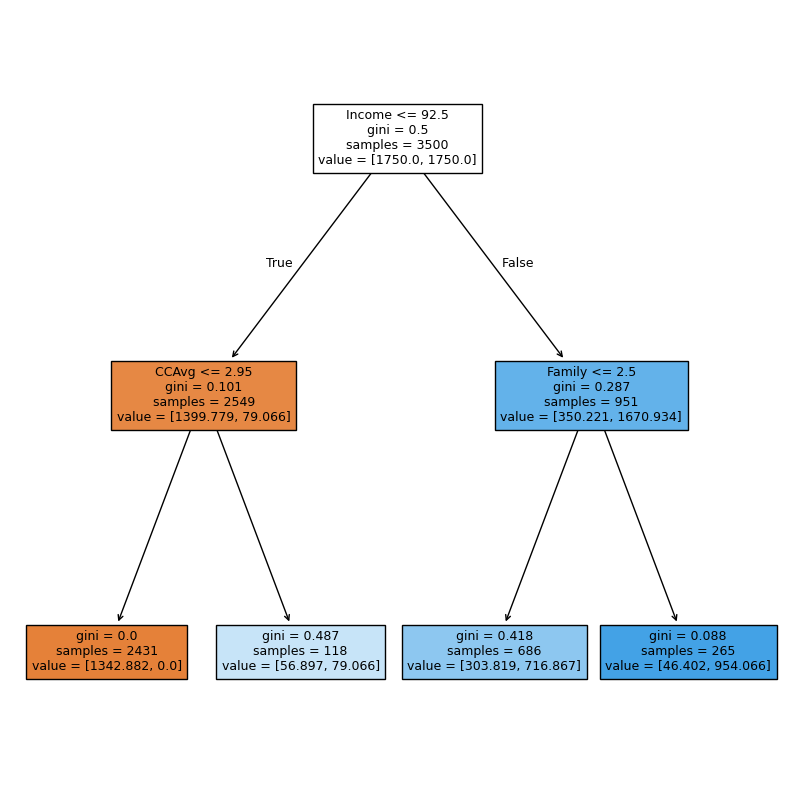

In [60]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# Add arrows to the decision tree
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [61]:
# Pre-pruning Export tree structure
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1342.88, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [56.90, 79.07] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [303.82, 716.87] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [46.40, 954.07] class: 1



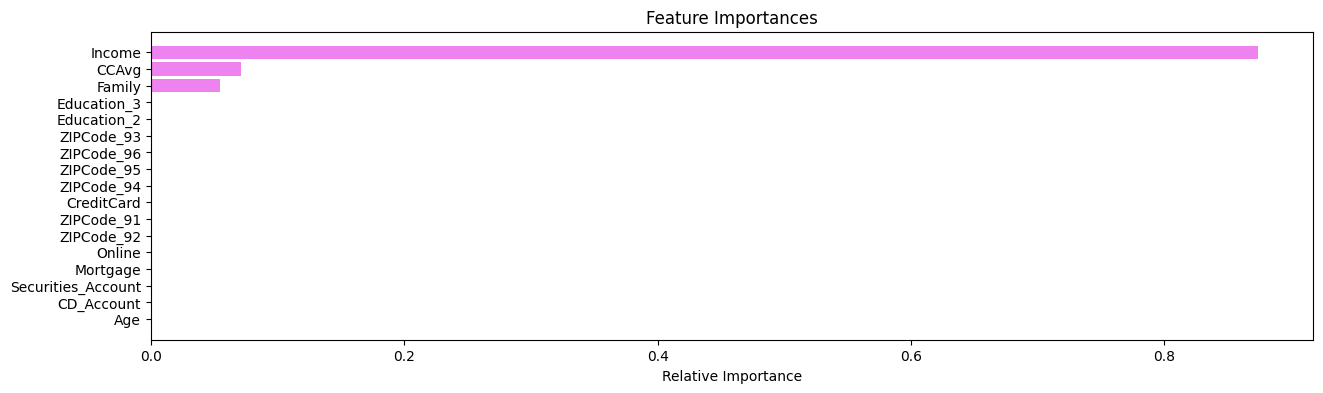

In [62]:
# Visualizing Relevent Importance
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15, 4))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Performance on Test dataset (Pre-Pruning)



Decision Tree Performance on Test Data:
   Accuracy  Recall  Precision  F1-Score
0  0.781333     1.0   0.310924  0.474359

Confusion Matrix on Test Data:


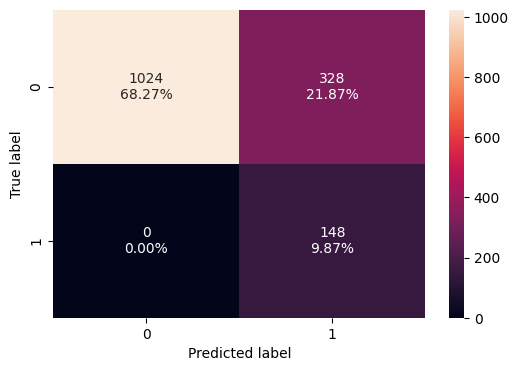

In [63]:
decision_tree_tune_perf_test = model_performance(estimator, X_test, y_test)
print("\n\nDecision Tree Performance on Test Data:")
print(decision_tree_tune_perf_test)
print("\nConfusion Matrix on Test Data:")
get_confusion_matrix(estimator, X_test, y_test)

###Post-Pruning

In [64]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Get the ccp_alphas and impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000254,0.000508
2,0.000260,0.001027
3,0.000269,0.001565
4,0.000276,0.002116
5,0.000277,0.002670
6,0.000278,0.003226
7,0.000279,0.003784
8,0.000281,0.004346
9,0.000324,0.005964


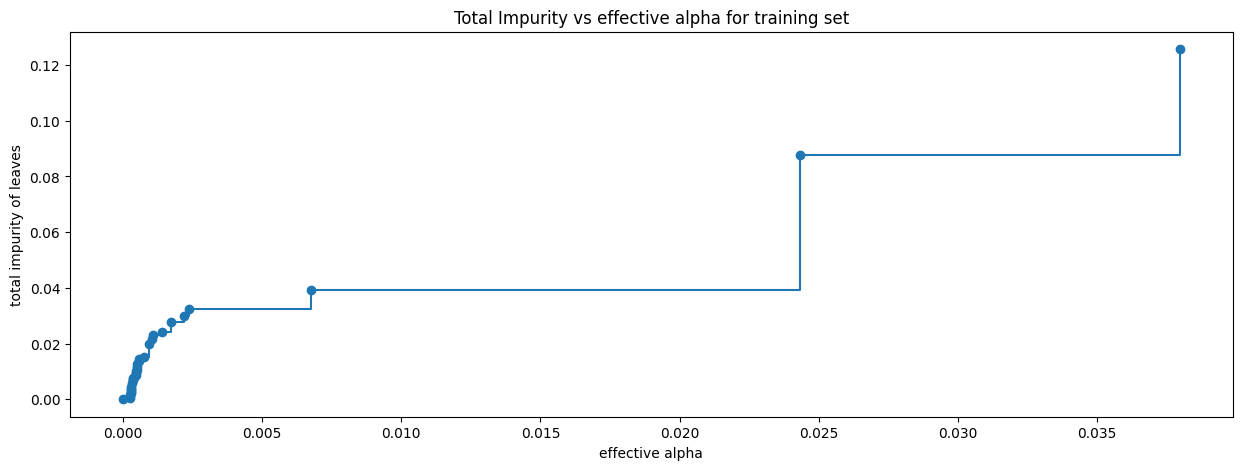

In [65]:
# Visualizing the data
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

#### Training decision tree with effective alphas

In [66]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight='balanced')
    clf.fit(X_train,y_train)
    clfs.append(clf)
print(f'Number of nodes in the last tree is: {clfs[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}')

Number of nodes in the last tree is: 3 with ccp_alpha: 0.04600735420668481


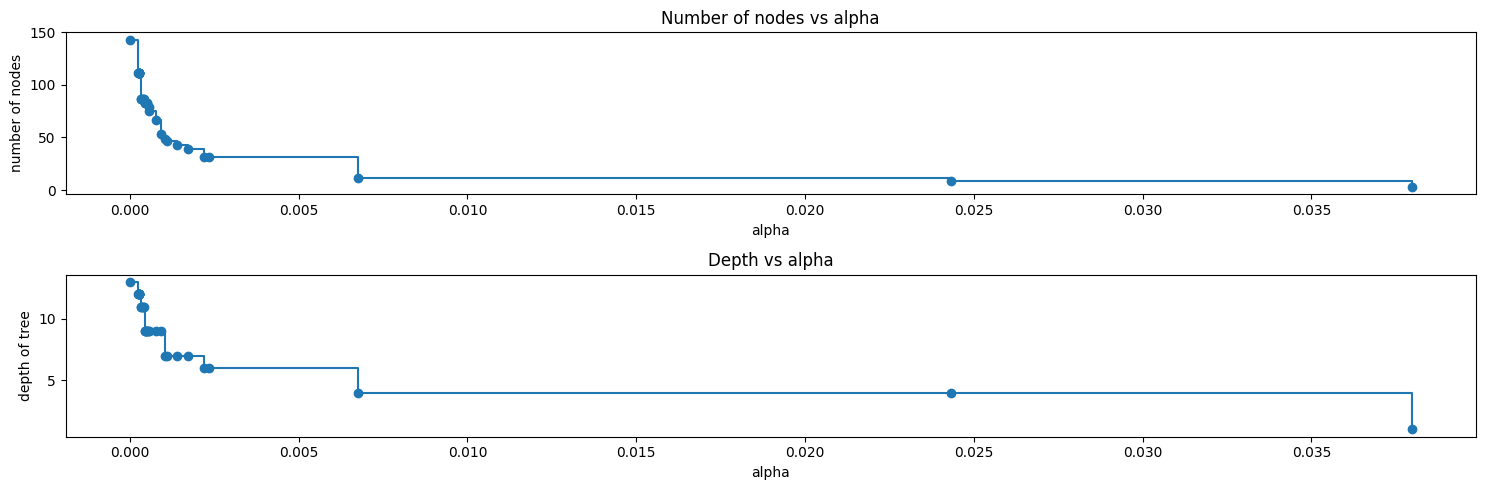

In [67]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(15, 5))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle='steps-post')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('number of nodes')
ax[0].set_title('Number of nodes vs alpha')
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle='steps-post')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('depth of tree')
ax[1].set_title('Depth vs alpha')
fig.tight_layout()

####Recall vs alpha for training and testing sets

In [68]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

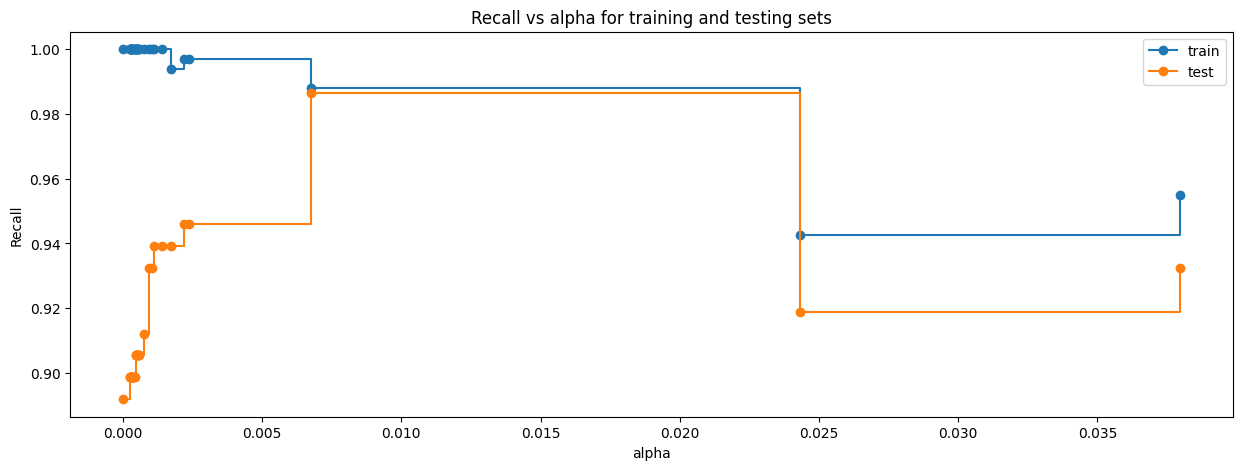

In [69]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [70]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.00675692779800522),
                       class_weight='balanced', random_state=1)


In [71]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=best_model.ccp_alpha, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.00675692779800522),
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

####Performance on Training data

In [72]:
decision_tree_tune_post_train = model_performance(estimator_2, X_test, y_test)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1-Score
0,0.937333,0.993243,0.6125,0.757732


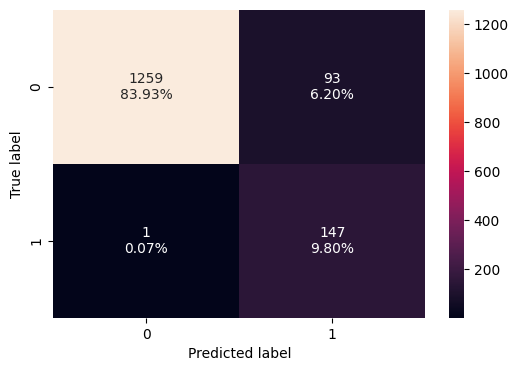

In [73]:
get_confusion_matrix(estimator_2, X_test, y_test)

#### Decision Tree view

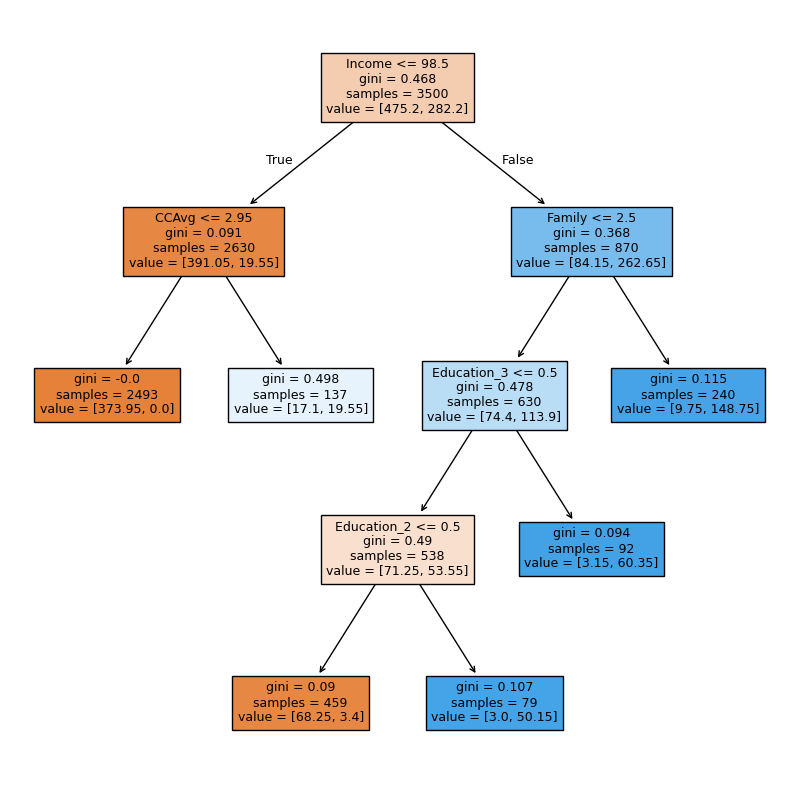

In [74]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# Add arrows to the decision tree
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

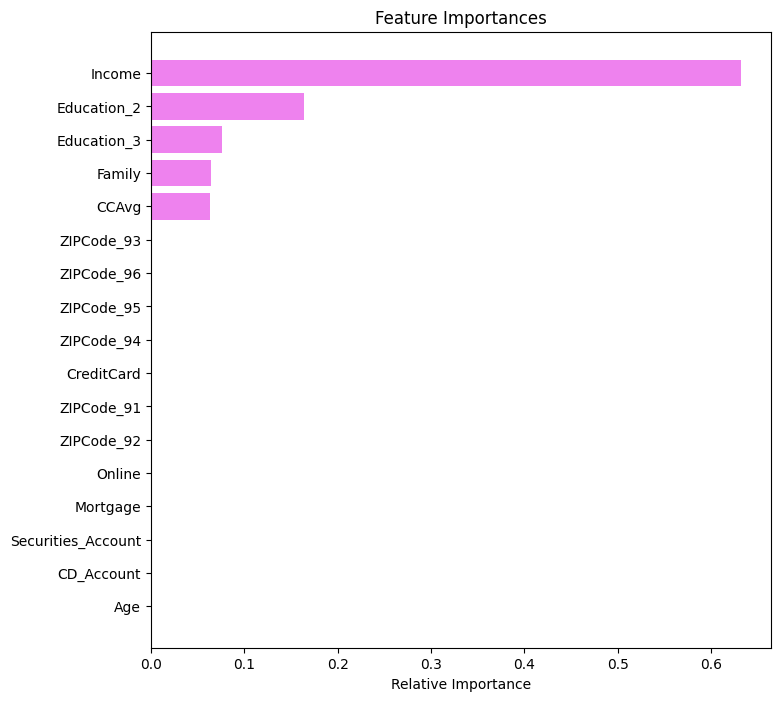

In [75]:
# Checking Importance

importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Performance on Test data



Decision Tree Performance on Test Data:
   Accuracy    Recall  Precision  F1-Score
0  0.937333  0.993243     0.6125  0.757732

Confusion Matrix on Test Data:


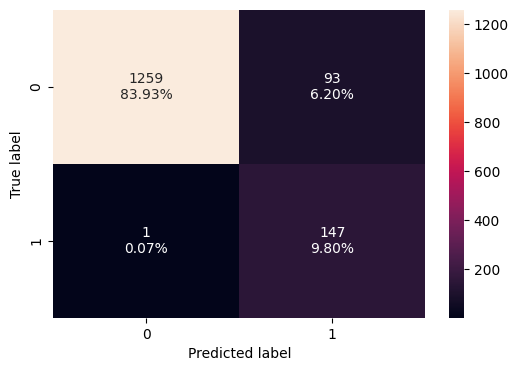

In [76]:
decision_tree_tune_post_test = model_performance(estimator_2, X_test, y_test)
print("\n\nDecision Tree Performance on Test Data:")
print(decision_tree_tune_post_test)
print("\nConfusion Matrix on Test Data:")
get_confusion_matrix(estimator_2, X_test, y_test)

## Model Performance Comparison and Final Model Selection

In [77]:
#training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree (default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]

models_train_comp_df


,Decision Tree (default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.789429,0.937333
Recall,1.0,1.000000,0.993243
Precision,1.0,0.310571,0.612500
F1-Score,1.0,0.473947,0.757732


In [78]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree (default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]

models_test_comp_df

,Decision Tree (default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.981333,0.781333,0.937333
Recall,0.898649,1.000000,0.993243
Precision,0.910959,0.310924,0.612500
F1-Score,0.904762,0.474359,0.757732


## Actionable Insights and Business Recommendations


**Target High-Income, High-Spending Customers**
  - People who earn more and spend more on their credit cards are more likely to say yes to a personal loan. So, the bank should focus its efforts on these customers and offer them personalized loan deals that match their lifestyle.

**Look at CD Account Holders**
  - Customers who have Certificate of Deposit (CD) accounts are more open to taking personal loans. These are loyal and low-risk customers, so it makes sense to offer them loans directly — they’re likely to say yes.

**Understand Securities Account Holders**
  - People who have investment accounts (called securities accounts) don’t seem very interested in taking loans. We need to figure out why — maybe they prefer investing over borrowing. Once we understand them better, we can try different loan offers that might appeal to them.

**Use Zip Codes to Guide Marketing**
  - Loan interest varies by neighborhood. By understanding what makes people in certain areas more or less likely to take a loan, the bank can run smarter, location-based marketing — like different ads for different zip codes.

**Education Matters Too**
  - People with higher education levels tend to accept loans a bit more often. So, the bank could mention education-related benefits in their marketing or subtly target this group.

**Age and Experience Count (a Bit)**
  - Customers aged 30 to 60, especially with decent work experience, are slightly more likely to accept loans. It’s not a huge factor, but the bank could tweak its message to connect better with this age group.

**Tune the Model to Catch More Yeses**
  - The bank’s prediction system is being tuned to find as many “yes” customers as possible — even if that means a few false alarms. It’s better to reach out to someone who might say no than to miss someone who would say yes. But the system should be regularly updated to stay accurate.

**Keep Exploring**
  - We still need to dig deeper into why securities account holders aren’t interested, and why people in some areas are more likely to take loans. Also, looking at things like local job markets or seasonal spending might help improve future predictions.

___